###### 1. Problem Statement
In a world... where movies made an estimated $41.7 billion in 2018, the film industry is more popular than ever.Find out the movie industry trends based below points.

1. Highest Revenue of movie with respect to genre
2. Popular subject
3. Rating and metascore of movies based on subject
4. Directors and revanue

###### 2. Setup tool

In [1]:
#Setting up right tool
import numpy as np
import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.set_option('display.max_columns', None)          # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import plotly.graph_objs as go


In [2]:
# Install and update plotly using this command to the latest version 

!pip install plotly --upgrade

Requirement already up-to-date: plotly in c:\users\lenovo\anaconda3\lib\site-packages (4.10.0)


In [3]:
# Install and update profiling using this command to the latest version 

!pip install pandas-profiling --upgrade


Requirement already up-to-date: pandas-profiling in c:\users\lenovo\anaconda3\lib\site-packages (2.9.0)


###### 3.DataBase setup

In [4]:
# DataBase setup
movie_data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')
movie_data.head()

Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                                                                                                                                                                                                      Description  \
0                                                                                                 A group of intergalactic criminals are forced to work together to stop a fanatical warrior from taking control of the universe.   
1                                                                                                 Following clues to the origin of mankind, a team finds a structure on a distant moon, but they soon realize they are not alone.   
2                                                                   Three girls are kidnapped by a man with a diagnosed 23 distinct personalities. They must try to escape before the apparent emergence of a frightful new 24th.   
3  In a city of humanoid animals, a hustling theater impresario's attempt to save his theater with a singing competition becomes grander than he anticipates even as its finalists' find that their lives will never be the same.   
4                                             A secret government agency recruits some of the most dangerous incarcerated super-villains to form a defensive task force. Their first mission: save the world from the apocalypse.   

               Director  \
0            James Gunn   
1          Ridley Scott   
2    M. Night Shyamalan   
3  Christophe Lourdelet   
4            David Ayer   

                                                                       Actors  \
0                        Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana   
1     Noomi Rapace, Logan Marshall-Green, Michael Fassbender, Charlize Theron   
2            James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula   
3  Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson   
4                          Will Smith, Jared Leto, Margot Robbie, Viola Davis   

   Year  Runtime (Minutes)  Rating   Votes  Revenue (Millions)  Metascore  
0  2014                121     8.1  757074              333.13       76.0  
1  2012                124     7.0  485820              126.46       65.0  
2  2016                117     7.3  157606              138.12       62.0  
3  2016                108     7.2   60545              270.32       59.0  
4  2016                123     6.2  393727              325.02       40.0

In [5]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


info function gives us the following insights into the movie_data dataframe:

There are a total of 1000 samples (rows) and 12 columns in the dataframe.

There are 4 columns with a numeric datatype , 3 columns with float datatype and 5 columns with an object datatype.

There are 128 missing values in the  Revenue data and 64 missing values in Metascore data.

In [6]:
movie_data.describe()

Rank         Year  Runtime (Minutes)       Rating         Votes  \
count  1000.000000  1000.000000        1000.000000  1000.000000  1.000000e+03   
mean    500.500000  2012.783000         113.172000     6.723200  1.698083e+05   
std     288.819436     3.205962          18.810908     0.945429  1.887626e+05   
min       1.000000  2006.000000          66.000000     1.900000  6.100000e+01   
25%     250.750000  2010.000000         100.000000     6.200000  3.630900e+04   
50%     500.500000  2014.000000         111.000000     6.800000  1.107990e+05   
75%     750.250000  2016.000000         123.000000     7.400000  2.399098e+05   
max    1000.000000  2016.000000         191.000000     9.000000  1.791916e+06   

       Revenue (Millions)   Metascore  
count          872.000000  936.000000  
mean            82.956376   58.985043  
std            103.253540   17.194757  
min              0.000000   11.000000  
25%             13.270000   47.000000  
50%             47.985000   59.500000  
75%            113.715000   72.000000  
max            936.630000  100.000000

###### 4.Pre-profile

In [7]:
profile=ProfileReport(df=movie_data, title="Movie Pre profile")
profile.to_file(output_file="./pre_profile.html")

In [8]:
profile


###### 5.Pre-processing data


In [9]:

# Find out the movies with duplicate 'Title'
movie_data.loc[movie_data.Title.duplicated(keep=False)]

Rank     Title                     Genre  \
239   240  The Host  Action,Adventure,Romance   
632   633  The Host       Comedy,Drama,Horror   

                                                                                                                                                                                                                             Description  \
239  When an unseen enemy threatens mankind by taking over their bodies and erasing their memories, Melanie will risk everything to protect the people she cares most about, proving that love can conquer all in a dangerous new world.   
632                                                                 A monster emerges from Seoul's Han River and focuses its attention on attacking people. One victim's loving family does what it can to rescue her from its clutches.   

          Director                                               Actors  Year  \
239  Andrew Niccol    Saoirse Ronan, Max Irons, Jake Abel, Diane Kruger  2013   
632   Bong Joon Ho  Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doona Bae  2006   

     Runtime (Minutes)  Rating  Votes  Revenue (Millions)  Metascore  
239                125     5.9  96852               26.62       35.0  
632                120     7.0  73491                2.20       85.0

There is no duplicate movies.The movie with title "The Host" was release on 2006 and 2013,so both are different

###### 6.Post-profile

In [10]:
# Filling the missing values with the median value
median_revenue = movie_data['Revenue (Millions)'].median()
movie_data['Revenue (Millions)'].fillna(value=median_revenue, inplace=True)


In [11]:
# Check if there are anymore missing values
movie_data['Revenue (Millions)'].isnull().any()

False

In [12]:
# Dropping the rows that having missing values for 'Metascore'
movie_data.dropna(subset=['Metascore'], inplace=True)

In [13]:
# Check if there are anymore missing values
movie_data.Metascore.isnull().any()

False

In [14]:
# Check the new shape of the dataset
movie_data.shape

(936, 12)

In [15]:
# Finally check for any missing values in the whole DataFrame
movie_data.isnull().any().any()

False

###### 7.Ask Right Questions

In [16]:
# Calculate the number of movies directed by each director over the 20 year period
movie_data.Director.value_counts().head(20)

Ridley Scott          8
M. Night Shyamalan    6
David Yates           6
Michael Bay           6
Paul W.S. Anderson    6
Danny Boyle           5
Justin Lin            5
Antoine Fuqua         5
David Fincher         5
Woody Allen           5
Peter Berg            5
J.J. Abrams           5
Zack Snyder           5
Martin Scorsese       5
Denis Villeneuve      5
Christopher Nolan     5
Tim Burton            4
Nicholas Stoller      4
Ron Howard            4
Jon Favreau           4
Name: Director, dtype: int64

In [17]:
# Find out the top 5 directors by Revenue
revenue_directors = movie_data.groupby('Director').agg({'Revenue (Millions)': 'mean', 'Title': 'count'})
top_5_revenue_directors = revenue_directors.rename(columns={'Title': 'Movies Count'}).sort_values('Revenue (Millions)', ascending=False)[:5]
top_5_revenue_directors

Revenue (Millions)  Movies Count
Director                                         
James Cameron               760.510             1
Colin Trevorrow             652.180             1
Joss Whedon                 541.135             2
Lee Unkrich                 414.980             1
Gary Ross                   408.000             1

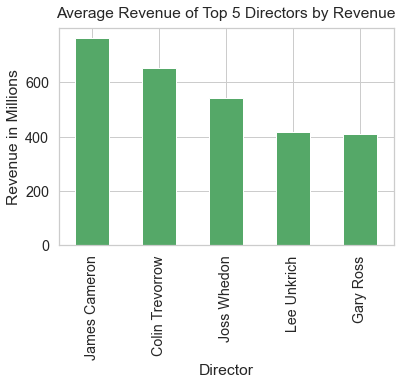

In [18]:
# Plot the result
ax = top_5_revenue_directors['Revenue (Millions)'].plot(kind='bar', color='g');
ax.set_ylabel('Revenue in Millions')
ax.set_title('Average Revenue of Top 5 Directors by Revenue', y=1.02)
ax.set_xticklabels(top_5_revenue_directors.index);
    

In [19]:
# Find out the top 5 directors by Rating
revenue_directors = movie_data.groupby('Director').agg({'Rating': 'mean', 'Title': 'count'})
top_5_revenue_directors = revenue_directors.rename(columns={'Title': 'Movies Count'}).sort_values('Rating', ascending=False)[:5]
top_5_revenue_directors


Rating  Movies Count
Director                                              
Christopher Nolan                   8.68             5
Makoto Shinkai                      8.60             1
Olivier Nakache                     8.60             1
Aamir Khan                          8.50             1
Florian Henckel von Donnersmarck    8.50             1

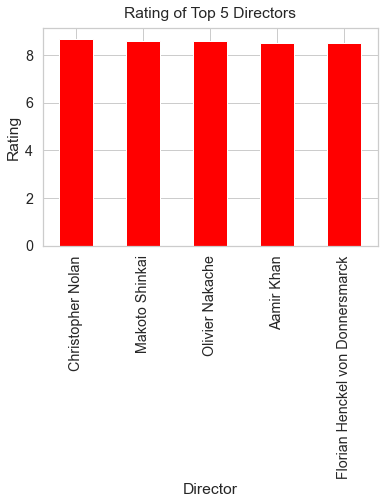

In [20]:
# Plot the result
ar = top_5_revenue_directors['Rating'].plot(kind='bar', color='red');
ar.set_ylabel('Rating')
ar.set_title('Rating of Top 5 Directors', y=1.02)
ar.set_xticklabels(top_5_revenue_directors.index);

In [21]:
# Find out the top 5 directors by Metacritic Score
meta_directors = movie_data.groupby('Director').agg({'Metascore': 'mean', 'Title': 'count'})
top_5_meta_directors = meta_directors.rename(columns={'Title': 'Movies Count'}).sort_values('Metascore', ascending=False)[:5]
top_5_meta_directors

Metascore  Movies Count
Director                                 
Barry Jenkins          99.0             1
Kenneth Lonergan       96.0             1
Todd Haynes            95.0             1
Kathryn Bigelow        94.5             2
Michael Goi            94.0             1

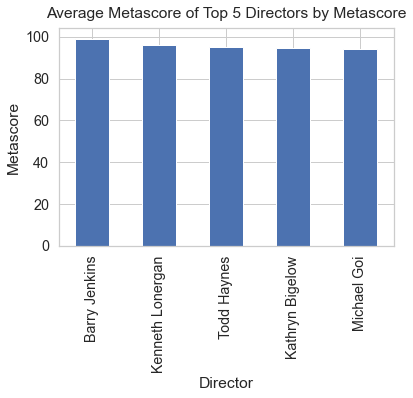

In [22]:
# Plot the result
ax = top_5_meta_directors['Metascore'].plot.bar();
ax.set_ylabel('Metascore')
ax.set_title('Average Metascore of Top 5 Directors by Metascore', y=1.02)
ax.set_xticklabels(top_5_meta_directors.index);

In [23]:
# Calculate the Average Revenue, Rating and Metascore of movies based on the Genre_count
genre_count_stats = movie_data.groupby('Genre')['Revenue (Millions)', 'Rating', 'Metascore'].mean()
genre_count_stats

Revenue (Millions)    Rating  Metascore
Genre                                                              
Action                              131.560000  4.900000  37.000000
Action,Adventure                    223.740000  6.400000  57.333333
Action,Adventure,Biography           16.500000  7.000000  62.500000
Action,Adventure,Comedy              95.733571  6.592857  47.214286
Action,Adventure,Crime               90.620000  6.433333  48.333333
...                                        ...       ...        ...
Romance,Sci-Fi                       47.985000  6.100000  65.000000
Sci-Fi                               20.760000  4.000000  53.000000
Sci-Fi,Thriller                      64.510000  5.000000  34.000000
Thriller                             41.175714  5.771429  59.714286
Thriller,War                         47.985000  6.000000  40.000000

[200 rows x 3 columns]

In [24]:
# Find out the top 5 Genre revenue and corresponding rating and Metacritic Score
meta_genre= movie_data.groupby('Genre').agg({'Title': 'count','Revenue (Millions)':'mean','Rating': 'mean','Metascore': 'mean'})
top_5_meta_genre = meta_genre.rename(columns={'Title': 'Movies Count'}).sort_values('Revenue (Millions)', ascending=False)[:5]
top_5_meta_genre


Movies Count  Revenue (Millions)    Rating  \
Genre                                                                    
Action,Sci-Fi                          2          318.340000  7.600000   
Adventure,Drama,Fantasy                5          276.008000  6.260000   
Adventure,Fantasy                      3          272.156667  7.733333   
Action,Adventure                       3          223.740000  6.400000   
Animation,Adventure,Comedy            26          221.336538  7.215385   

                            Metascore  
Genre                                  
Action,Sci-Fi               64.000000  
Adventure,Drama,Fantasy     64.200000  
Adventure,Fantasy           61.000000  
Action,Adventure            57.333333  
Animation,Adventure,Comedy  68.730769

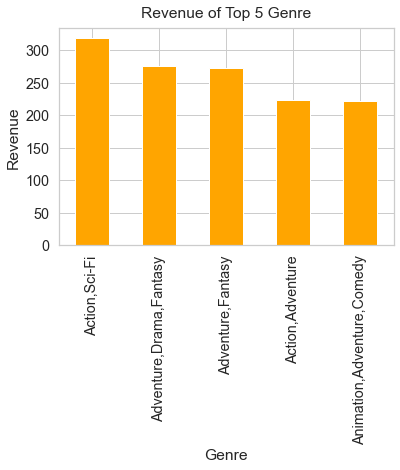

In [25]:
# Plot the result
ax = top_5_meta_genre['Revenue (Millions)'].plot(kind='bar', color='orange');
ax.set_ylabel('Revenue')
ax.set_title('Revenue of Top 5 Genre', y=1.02)
ax.set_xticklabels(top_5_meta_genre.index);

In [26]:
# Find out the top 5 Genre Rating and corresponding Revenue and Metacritic Score
meta_rt = movie_data.groupby('Genre').agg({'Title': 'count','Rating': 'mean','Revenue (Millions)':'mean','Metascore': 'mean'})
top_5_meta_rt = meta_rt.rename(columns={'Title': 'Movies Count'}).sort_values('Rating', ascending=False)[:5]
top_5_meta_rt

Movies Count  Rating  Revenue (Millions)  Metascore
Genre                                                                       
Animation,Drama,Fantasy             1     8.6               4.680       79.0
Drama,Family,Music                  1     8.5               1.200       42.0
Animation,Drama,Romance             1     8.4              47.985       80.0
Drama,Western                       1     8.4             162.800       81.0
Adventure,Drama,Sci-Fi              2     8.3             208.210       77.0

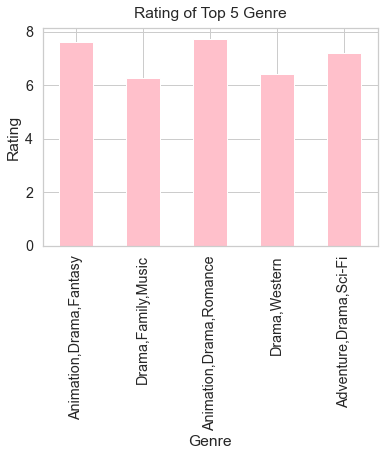

In [27]:
# Plot the result
ax = top_5_meta_genre['Rating'].plot(kind='bar', color='pink');
ax.set_ylabel('Rating')
ax.set_title('Rating of Top 5 Genre', y=1.02)
ax.set_xticklabels(top_5_meta_rt.index);

In [28]:
# Find out the top 5 Genre Metascore and corresponding Revenue and Rating
meta_ms = movie_data.groupby('Genre').agg({'Title': 'count','Metascore': 'mean','Rating': 'mean','Revenue (Millions)':'mean'})
top_5_meta_ms = meta_ms.rename(columns={'Title': 'Movies Count'}).sort_values('Metascore', ascending=False)[:5]
top_5_meta_ms

Movies Count  Metascore  Rating  Revenue (Millions)
Genre                                                                      
Drama,Fantasy,War                  1      98.00     8.2             37.6200
Animation,Fantasy                  1      86.00     7.6              0.9200
Crime,Drama,History                2      85.50     7.9             39.0200
Animation,Comedy,Drama             1      85.00     7.8              0.2900
Drama,History,Thriller             4      84.75     7.5             53.8975

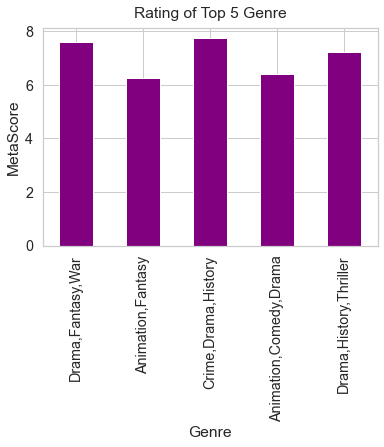

In [29]:
# Plot the result
ax = top_5_meta_genre['Rating'].plot(kind='bar', color='purple');
ax.set_ylabel('MetaScore')
ax.set_title('Rating of Top 5 Genre', y=1.02)
ax.set_xticklabels(top_5_meta_ms.index);


7.3 Is the growth of the movie industry on the rise ?

Text(0, 0.5, 'Movies Count')

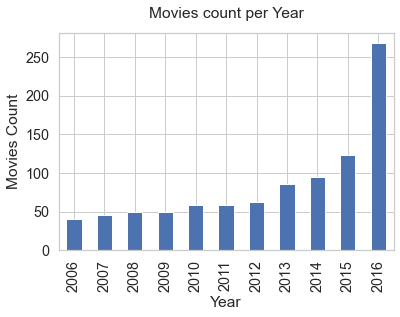

In [155]:
movies_year = movie_data.groupby('Year')['Rank'].count()
ax = movies_year.plot.bar();
ax.set_title('Movies count per Year', y=1.04)
ax.set_ylabel('Movies Count')

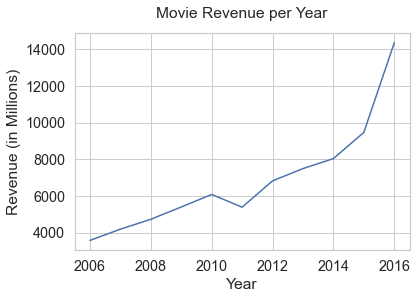

In [156]:
movies_revenue = movie_data.groupby('Year')['Revenue (Millions)'].sum()
ax = movies_revenue.plot.line();
ax.set_title('Movie Revenue per Year', y=1.04)
ax.set_ylabel('Revenue (in Millions)');

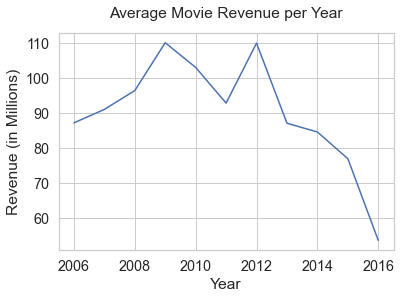

In [157]:
movies_avg_revenue = movie_data.groupby('Year')['Revenue (Millions)'].mean()
ax = movies_avg_revenue.plot.line();
ax.set_title('Average Movie Revenue per Year', y=1.04)
ax.set_ylabel('Revenue (in Millions)');

In [177]:
#Lets take the list of all directors who have directed total number of movies of 5 or more.
most_active_directors = movie_data['Director'].value_counts()[movie_data['Director'].value_counts()>=5]
most_active_directors

Ridley Scott          8
Michael Bay           6
Paul W.S. Anderson    6
David Yates           6
M. Night Shyamalan    6
Justin Lin            5
Antoine Fuqua         5
J.J. Abrams           5
Peter Berg            5
David Fincher         5
Zack Snyder           5
Woody Allen           5
Martin Scorsese       5
Denis Villeneuve      5
Danny Boyle           5
Christopher Nolan     5
Name: Director, dtype: int64

In [21]:
movies_rating = movie_data.groupby('Year')['Rating'].mean()
movies_rating.head(15)


Year
2006    7.125000
2007    7.133962
2008    6.784615
2009    6.960784
2010    6.826667
2011    6.838095
2012    6.925000
2013    6.812088
2014    6.837755
2015    6.602362
2016    6.436700
Name: Rating, dtype: float64

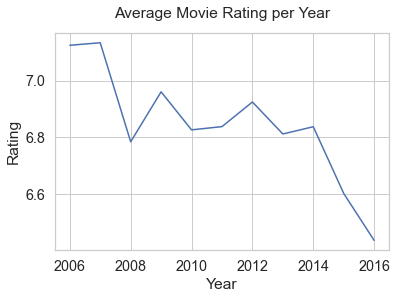

In [22]:
ax = movies_rating.plot.line();
ax.set_title('Average Movie Rating per Year', y=1.04)
ax.set_ylabel('Rating');

In [28]:
movie_data.query('Year == 2016').Genre.value_counts().head(10)

Drama                         25
Comedy                        15
Horror,Thriller               11
Comedy,Drama                  11
Animation,Adventure,Comedy    10
Crime,Drama,Thriller           9
Comedy,Drama,Romance           8
Action,Adventure,Fantasy       7
Thriller                       7
Action,Adventure,Sci-Fi        7
Name: Genre, dtype: int64

In [73]:
movie_data.query('Year == 2016').Genre.value_counts().loc['Animation,Drama,Fantasy']

1

In [77]:
movie_data.query('Year == 2016').Genre.value_counts().loc['Animation,Drama,Romance']

1

In [ ]:
We observed and came across, popular subject movies released very few in 2016 which is amin reason for decreasing movie rating

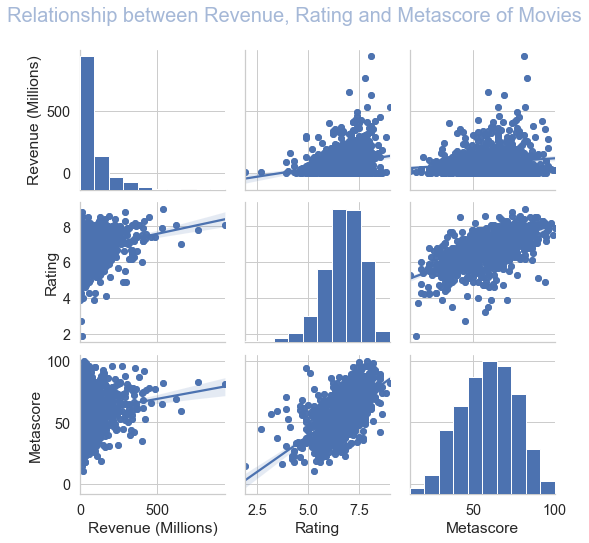

In [101]:
a=sns.pairplot(movie_data, palette="muted",height=2.5,vars=['Revenue (Millions)', 'Rating', 'Metascore'], kind='reg');

#to change the size of scatterpoints
a=a.map_offdiag(plt.scatter,s=35,alpha=0.9)

#additional line to adjust some appearance issues
plt.subplots_adjust(top=0.9);

#set the title of the graph
a.fig.suptitle('Relationship between Revenue, Rating and Metascore of Movies',fontsize=20,color='b',alpha=0.5);

###### 8.Conclusion
This section draws the conclusion from the exploration done on the dataset in Section 4.

Director

1)The director who has earned the highest average revenue is James Cameron. However he has directed only 1 movie in the 10 year period.
2)Christopher Nolan's movies are the most popular among viewers as the average rating for his movies is the highest in the 10 year period.
3)Critics liked Barry Jenkins's movies the most. He is closely followed by Kenneth Lonergan and Todd Haynes
4)With respect to Directors who are most active, critics favor David Fincher in terms of Average Metascore.

Genre

1)As the Genre count increases in a movie, its Revenue, Rating and Metascore are on the rise.However, revenue is significantly high for movies with Genre count of 3.
2)Adventure as Genre is a common factor for movies that brings in more Revenue, with the Genre combination of "Adventure, Drama, Fantasy" earning the highest Revenue
3)The most popular Genre is Drama and the Genre combination of "Animation, Drama, Fantasy" earns the highest Rating.
4)Again Drama is popular among Critics as well, with the Genre combination of "Drama, Fantasy, War" earning the highest Metascore.

Industry Growth

1)Industry is growing with respect to number of movies released and the total revenue gained year on year.
2)The average revenue of movies year on year is showing a negative trend. This is probably because of increased competition and more movies released in the industry.
3)The popularity of movies is also showing a negative trend year on year. This is probably because of more movies released with Genre combinations which are unpopular among viewers.

Rating for movies in General

1)From the correlation graph, it is clear that People and Critics rate movies in a similar manner.
2)In general, movies with higher rating and metascore tend to earn more revenue as well.

###### 9.Actionable Insights 


This is based on the conclusions drawn from the EDA done

1)Produce multiple movies with best features - The movie industry is growing very fast. More movies are released year on year and the competition is very high and the revenue is distributed among many movies. It would not be a good idea to wait for that ONE BIG MOVIE like Avatar (by James Cameron) that brings highest Revenue, Rating and Metascore. So, produce more movies using the best features (explained below) for reaping the maximum benefits.

2)Produce movies with 3 Genre combination  - Include a mix of Drama, Animation, Adventure, Sci-Fi, Fantasy. The movies should relate to audience with real life incidents, should move them to the edge of the seats and should enhance their imagination.

3)Produce movies that will satisfy both People and Critics - These movies will earn higher Revenue more often than not.